In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
job="data_base_administrator"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [61]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Warrior tech solutions,SQL Developer,Remote,500000.0,"Relational databases, Data structures, Databas...",NaN,Data Base Administrator
1,Metaphor Consulting,SQL Fresher Developer,Jamshedpur,500000.0,SQL,5.0,Data Base Administrator
2,Corporate Hierarchy Solutions Pvt. Ltd,SQL Developer,India,1800000.0,"Microsoft SQL Server, Databases, SQL, Analysis...",NaN,Data Base Administrator
3,KJ Systems India,DataBase Developer (SQL),India,2400000.0,"SQL, Analysis skills, Communication skills",3.8,Data Base Administrator
4,Jinendra infotech pvt ltd.,T-SQL Developer.,Remote,850000.0,"Power BI, Data modeling, Azure, Microsoft SQL ...",NaN,Data Base Administrator


In [62]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                     9
company_rating           128
standardized_job_role      0
dtype: int64

In [63]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [64]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
12,Wellpoint IT Solutions,SQL Developer,India,0.0,"Performance tuning, Microsoft SQL Server, SQL,...",4.6,Data Base Administrator
13,Flipkoins,Database Developer – SQL - Remote - Indian Tim...,Remote,0.0,"Microsoft SQL Server, SQL, PostgreSQL, SSIS, C...",4.7,Data Base Administrator
15,rccenterprises,SQL Developer,India,0.0,"Microsoft Access, Oracle, Business intelligenc...",NaN,Data Base Administrator
24,Citta Solutions,SQL Developer,Remote,0.0,"C#, Microsoft SQL Server, .NET, SQL, Scripting",3.4,Data Base Administrator
25,Dicetek LLC,Engineer - ETL and PL/SQL Developer,Remote,0.0,"Oracle, Microsoft SQL Server, SQL, SSIS, Infor...",4.3,Data Base Administrator
...,...,...,...,...,...,...,...
571,E Hook Systems,DB2 DBA,Delhi,0.0,"Performance tuning, Data modeling, Remedy, DB2...",NaN,Data Base Administrator
575,Oracle,Senior DevOps Engineer - Autonomous Database,India,0.0,"Cloud infrastructure, Oracle, OS Kernels, APIs",3.8,Data Base Administrator
576,Oracle,Principal DevOps Engineer - Autonomous Database,India,0.0,"Cloud infrastructure, Oracle, Software trouble...",3.8,Data Base Administrator
585,Mobineers Info Systems,SQL Developer,India,0.0,"Microsoft SQL Server, SQL",3.8,Data Base Administrator


### Filling the null values by replacing with average salary of company rating

In [66]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [67]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [68]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Warrior tech solutions,SQL Developer,Remote,5.000,"Relational databases, Data structures, Databas...",0.0,Data Base Administrator
1,Metaphor Consulting,SQL Fresher Developer,Jamshedpur,5.000,SQL,5.0,Data Base Administrator
2,Corporate Hierarchy Solutions Pvt. Ltd,SQL Developer,India,18.000,"Microsoft SQL Server, Databases, SQL, Analysis...",0.0,Data Base Administrator
3,KJ Systems India,DataBase Developer (SQL),India,24.000,"SQL, Analysis skills, Communication skills",3.8,Data Base Administrator
4,Jinendra infotech pvt ltd.,T-SQL Developer.,Remote,8.500,"Power BI, Data modeling, Azure, Microsoft SQL ...",0.0,Data Base Administrator
...,...,...,...,...,...,...,...
588,Vodafone,"Assistant Manager_Senior Engineer_Unix, SQL-PL...",Pune,4.500,"Business intelligence, SAS, SQL, Problem manag...",3.9,Data Base Administrator
589,Google,Databases Engineer,Bengaluru,12.554,"Data modeling, Oracle, Software troubleshootin...",4.3,Data Base Administrator
590,Mastercard,Software Engineer-II (PL/SQL),Vadodara,7.000,"Oracle, JUnit, Database development, Git, Test...",4.2,Data Base Administrator
591,State Street,"Lead Database Performance Engineer, Officer",Hyderābād,6.500,"Performance tuning, Power BI, Cloud infrastruc...",3.5,Data Base Administrator


In [69]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [70]:
df.describe()

,salary_lpa,company_rating
count,593.000000,593.000000
mean,8.479928,2.985497
std,7.645467,1.642517
min,0.900000,0.000000
25%,5.000000,2.700000
50%,6.000000,3.700000
75%,8.406841,4.000000
max,48.000000,5.000000


In [71]:
df.nunique()

company_name             470
job_role                 332
job_location              55
salary_lpa               241
skills                   520
company_rating            30
standardized_job_role      1
dtype: int64

In [72]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [74]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [75]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                    Skill  Count
3                     sql    260
13                 oracle    218
5    microsoft sql server    206
15     performance tuning    180
11                  azure    112
..                    ...    ...
62             javascript      1
156                 react      1
155                  json      1
154              selenium      1
231                  rest      1

[232 rows x 2 columns]


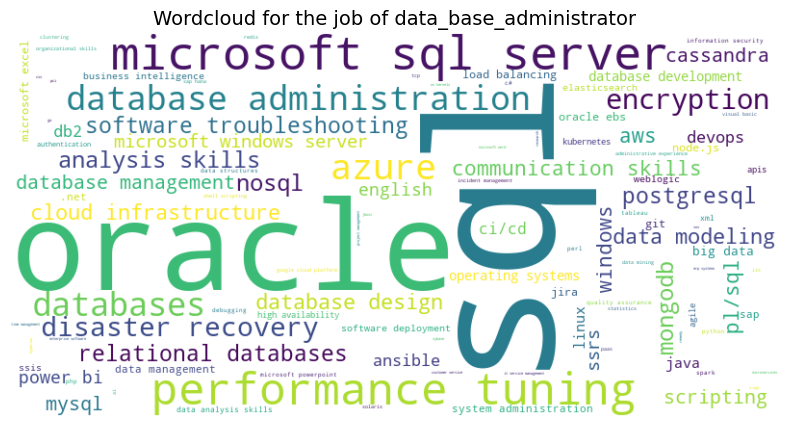

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


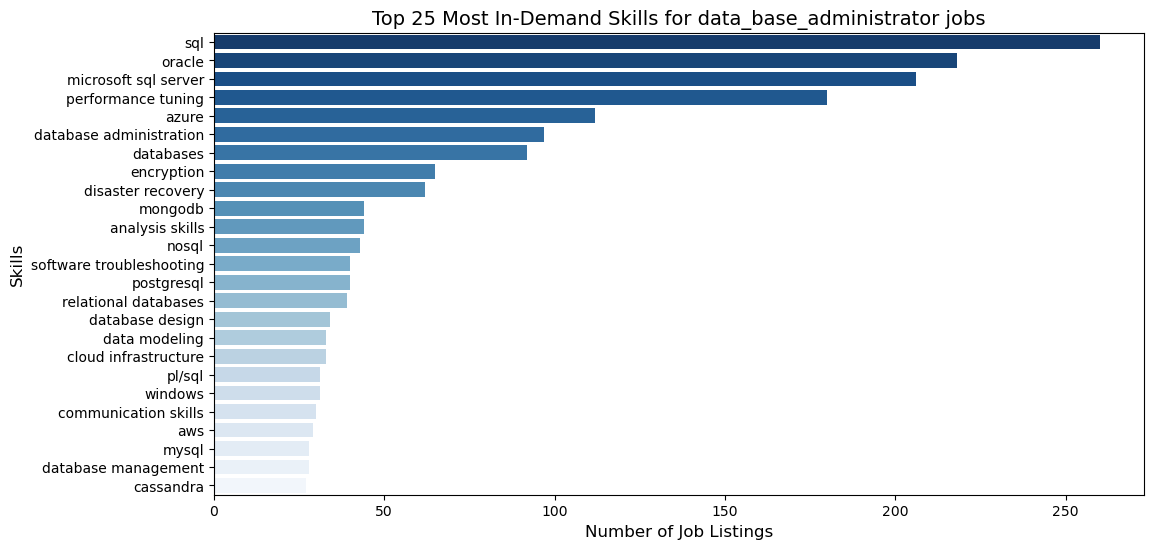

In [77]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [79]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                                company_name  salary_lpa
393                              Stratologon       48.00
106                                     DTCC       48.00
339  Renovision Automation Services Pvt. Ltd       48.00
337                               RemoteStar       48.00
387                                  Squalas       48.00
177                           IT Convergence       44.40
437                              WOWinfotech       44.40
126                  Eazy Business Solutions       43.98
296              One Point One Solutions Ltd       42.00
424                       Vaspp Technologies       42.00


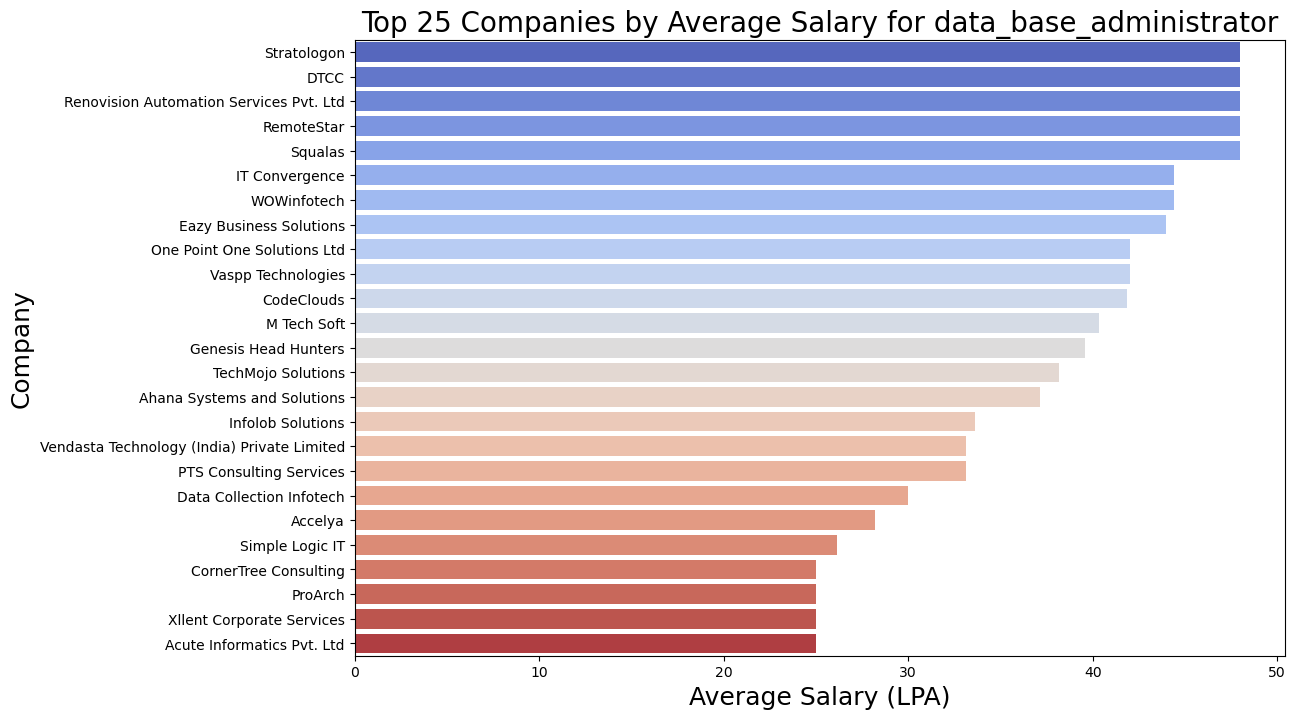

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

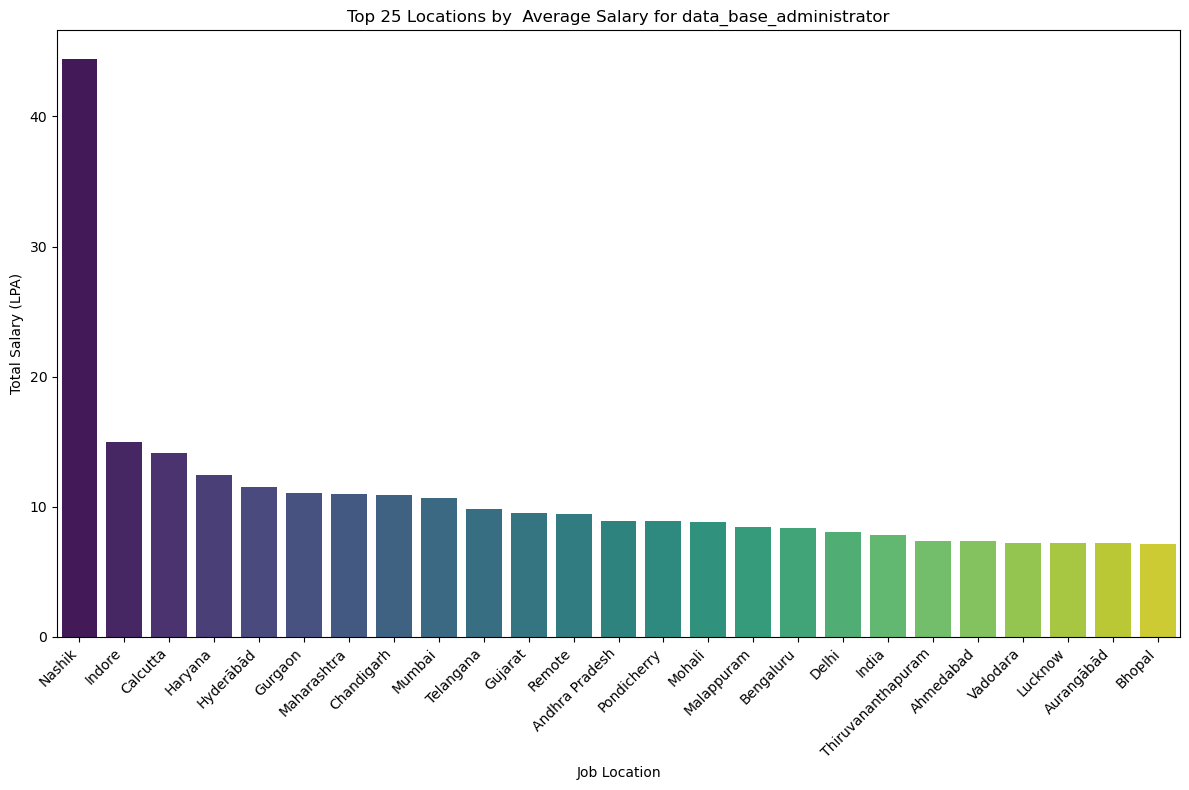

In [82]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

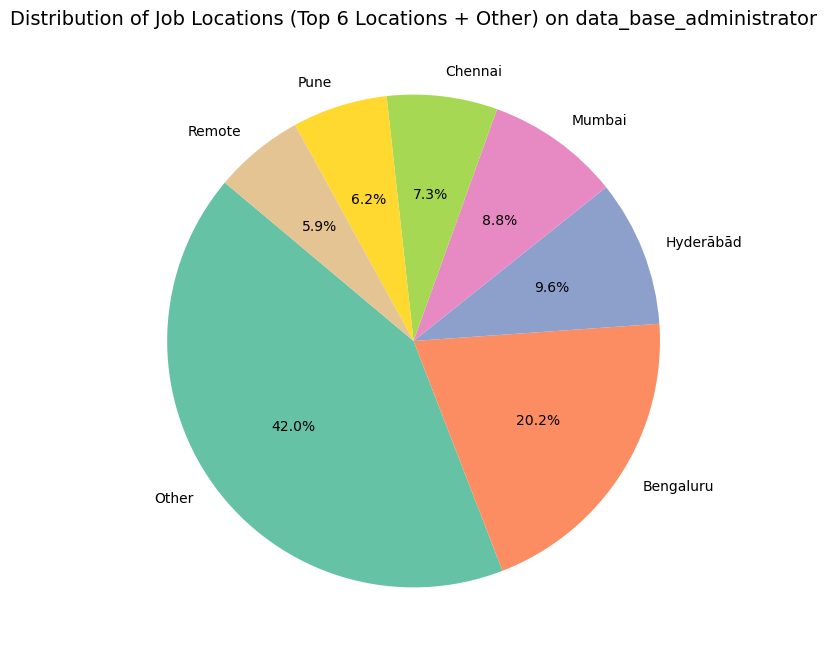

In [83]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

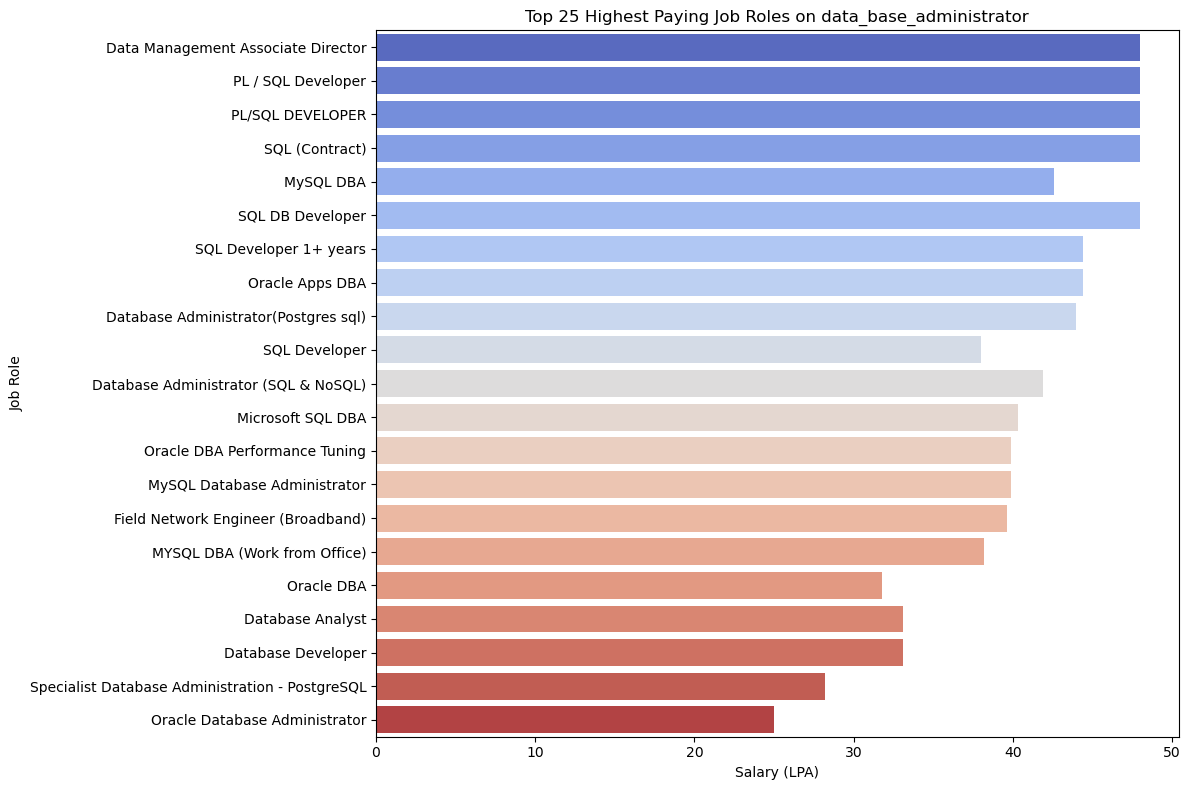

In [85]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [87]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_25272\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


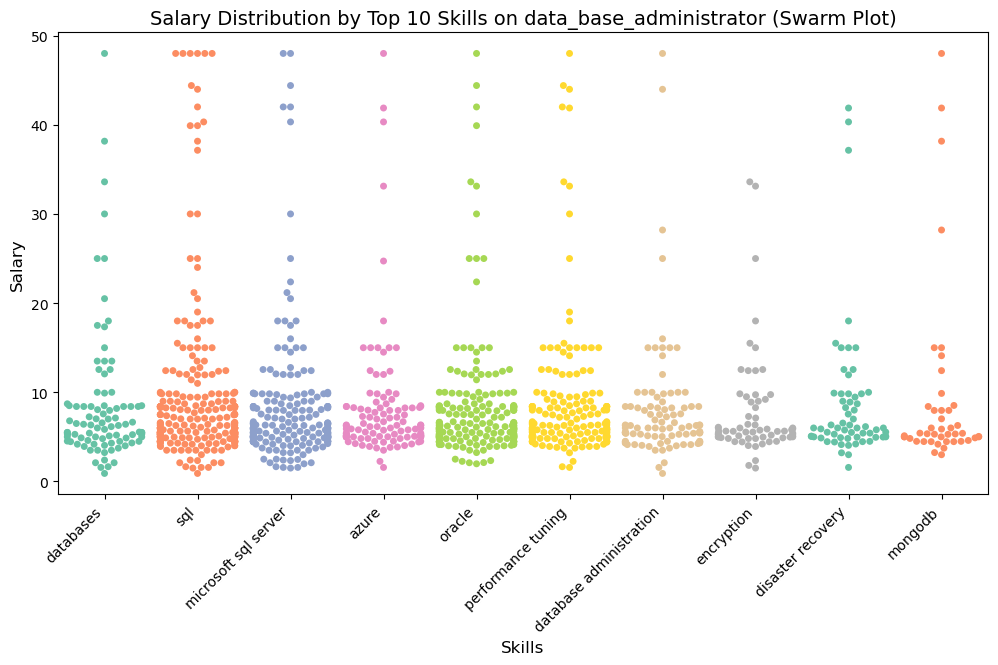

In [88]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

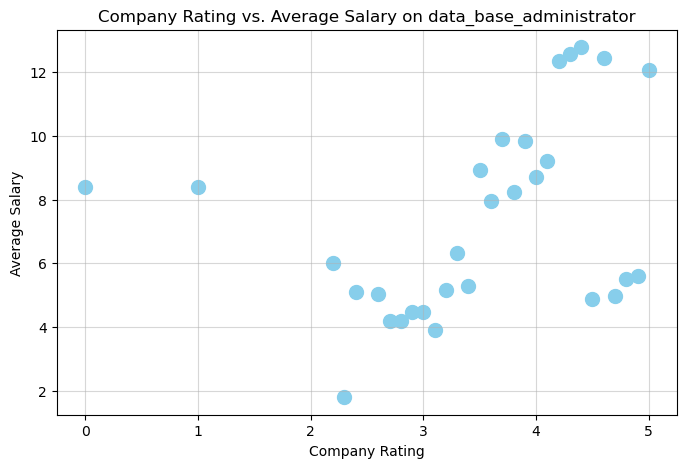

In [90]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [91]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.18133565222943743